<a href="https://colab.research.google.com/github/Angelogallardo05/DATA602--07assignment/blob/main/AngelGallardo07_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7**

# **Weeks 8 & 9 - Pandas**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section.

* You must use Pandas as the **primary tool** to process your data.

* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  
 * https://www.youtube.com/watch?v=inN8seMm7UI (Getting started with Colab).

* Your data should need some "work", or be considered "dirty".  You must show your skills in data cleaning/wrangling.

### **Some data examples:**
•	https://www.data.gov/

•	https://opendata.cityofnewyork.us/

•	https://datasetsearch.research.google.com/

•	https://archive.ics.uci.edu/ml/index.php

### **Resources:**

•	https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

•	https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html


### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.

### **You may work as a group or indivdually on this assignment.**


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include:

* Summary statistics means, medians, quartiles,
* Missing value information
* Any other relevant information about the dataset.  



In [56]:
import pandas as pd

In [57]:
df = pd.read_csv('/content/Real_Estate_Sales_2001-2021_GL_20240311.csv', usecols= range(10))

<ipython-input-57-c1b25abd8393>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Real_Estate_Sales_2001-2021_GL_20240311.csv', usecols= range(10))


In [58]:
print(df.head(10))

   Serial Number  List Year Date Recorded     Town                Address  \
0        2020348       2020    09/13/2021  Ansonia        230 WAKELEE AVE   
1          20002       2020    10/02/2020  Ashford        390 TURNPIKE RD   
2         210317       2021    07/05/2022     Avon        53 COTSWOLD WAY   
3         200212       2020    03/09/2021     Avon       5 CHESTNUT DRIVE   
4         200243       2020    04/13/2021     Avon  111 NORTHINGTON DRIVE   
5         200377       2020    07/02/2021     Avon     70 FAR HILLS DRIVE   
6         200109       2020    12/09/2020     Avon     57 FAR HILLS DRIVE   
7        2020180       2020    03/01/2021   Berlin    1539 FARMINGTON AVE   
8        2020313       2020    07/01/2021   Berlin      216 WATCH HILL RD   
9         200097       2020    06/04/2021  Bethany            23 AMITY RD   

   Assessed Value  Sale Amount  Sales Ratio Property Type Residential Type  
0        150500.0     325000.0       0.4630    Commercial              NaN 

# Data Wrangling
Create a subset of your original data and perform the following.  

1. Modify multiple column names.

2. Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct structure if needed.

3. Fix missing and invalid values in data.

4. Create new columns based on existing columns or calculations.

5. Drop column(s) from your dataset.

6. Drop a row(s) from your dataset.

7. Sort your data based on multiple variables.

8. Filter your data based on some condition.

9. Convert all the string values to upper or lower cases in one column.

10. Check whether numeric values are present in a given column of your dataframe.

11. Group your dataset by one column, and get the mean, min, and max values by group.
  * Groupby()
  * agg() or .apply()

12. Group your dataset by two columns and then sort the aggregated results within the groups.

**You are free (and should) to add on to these questions.  Please clearly indicate in your assignment your answers to these questions.**

#2. convert column 8 , 'sales ratio' into strings

In [59]:

dtype_dict = {'column_8': str}

1. Remove the Serial Number and Sale Amount

In [60]:

df.rename(columns={'Serial Number': 'ID'}, inplace=True)
df.rename(columns={'Sale Amount': 'Sale Price'}, inplace=True)

In [7]:
print(df.head(10))

        ID  List Year Date Recorded     Town                Address  \
0  2020348       2020    09/13/2021  Ansonia        230 WAKELEE AVE   
1    20002       2020    10/02/2020  Ashford        390 TURNPIKE RD   
2   210317       2021    07/05/2022     Avon        53 COTSWOLD WAY   
3   200212       2020    03/09/2021     Avon       5 CHESTNUT DRIVE   
4   200243       2020    04/13/2021     Avon  111 NORTHINGTON DRIVE   
5   200377       2020    07/02/2021     Avon     70 FAR HILLS DRIVE   
6   200109       2020    12/09/2020     Avon     57 FAR HILLS DRIVE   
7  2020180       2020    03/01/2021   Berlin    1539 FARMINGTON AVE   
8  2020313       2020    07/01/2021   Berlin      216 WATCH HILL RD   
9   200097       2020    06/04/2021  Bethany            23 AMITY RD   

   Assessed Value  Sale Price  Sales Ratio Property Type Residential Type  
0        150500.0    325000.0       0.4630    Commercial              NaN  
1        253000.0    430000.0       0.5883   Residential    Single

#3 remove missing values

In [61]:

missing_values = df.isna().sum()

# Display the count of missing values for each column
print(missing_values)

ID                       0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Price               0
Sales Ratio              0
Property Type       382446
Residential Type    393884
dtype: int64


11. Group your dataset by one column, and get the mean, min, and max values by group.
filter sales ratio by property and get the mean, std, min, max

In [62]:
sales_ratio_stats = df.groupby('Property Type')['Sales Ratio'].describe()

#Group by two filters and describe (property type, and List year)

In [63]:
sales_p_l = df.groupby(['Property Type', 'Residential Type'])['Sales Ratio'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()


 sales ratio is calculated as assessed value divided by sale price. It looks like Commercial properties are typically sold at  a lower price than assessed. This means that there is a greater opportunity for the property to apperciate in value.
 Residential properties on the other hand are sold at a hihger price than the assessed value. However, both data sets have huge variances. I also noticed that the Residential data includes various types of homes including single family.

In [64]:
print(sales_ratio_stats.head(8))

                   count       mean          std       min       25%  \
Property Type                                                          
Apartments         943.0   1.436511     6.161979  0.000000  0.354100   
Commercial        4208.0  11.687843    61.310579  0.000000  0.490075   
Condo           105420.0   0.859678     7.166493  0.000000  0.587097   
Four Family       2150.0   1.421730     4.410858  0.000000  0.569736   
Industrial         533.0   1.504944     8.014744  0.004236  0.460000   
Public Utility       8.0   2.936553     4.753591  0.024650  0.523239   
Residential     112099.0   0.651249     2.412618  0.000000  0.461700   
Single Family   401612.0   8.115082  2217.061338  0.000000  0.611774   

                     50%       75%           max  
Property Type                                     
Apartments      0.462286  0.593730  9.219310e+01  
Commercial      0.676950  1.000125  1.097024e+03  
Condo           0.686107  0.810000  2.106697e+03  
Four Family     0.795802


here we see that residential types with the lowest deciations from the mean two and three family homes. Howemver, they have a lower amount of data compared to the rest.

In [65]:
print(sales_p_l)

   Property Type Residential Type   count      mean          std       min  \
0          Condo            Condo  105420  0.859678     7.166493  0.000000   
1    Four Family      Four Family    2150  1.421730     4.410858  0.000000   
2    Residential            Condo   23369  0.738560     4.537434  0.000000   
3    Residential      Four Family     613  0.640981     2.265409  0.109377   
4    Residential    Single Family   78954  0.634329     1.430256  0.000000   
5    Residential     Three Family    2956  0.508459     0.593619  0.000577   
6    Residential       Two Family    6207  0.606758     0.934521  0.005325   
7  Single Family    Single Family  401612  8.115082  2217.061338  0.000000   
8   Three Family     Three Family   12586  1.444156     3.835679  0.000000   
9     Two Family       Two Family   26408  1.213041     2.477402  0.000000   

            max  
0  2.106697e+03  
1  1.825040e+02  
2  2.135675e+02  
3  5.593330e+01  
4  1.186760e+02  
5  2.790200e+01  
6  6.020170e+01

I decide to make analysis on single family homes. To do this, I have to filter the residential and single family rows under the Property type, and then subfilter it by the single family residential type.

In [66]:
# 8. Filter the data where 'Property Type' is 'Residential'
residential_df = df[df['Property Type'].isin(['Residential', 'Single Family'])]
residential_df['Residential Type'] = 'Single Family'

# Display the filtered DataFrame
print(residential_df)

             ID  List Year Date Recorded           Town  \
1         20002       2020    10/02/2020        Ashford   
2        210317       2021    07/05/2022           Avon   
3        200212       2020    03/09/2021           Avon   
4        200243       2020    04/13/2021           Avon   
5        200377       2020    07/02/2021           Avon   
...         ...        ...           ...            ...   
1054153  190272       2019    08/03/2020         Wilton   
1054154  190272       2019    06/24/2020     New London   
1054155  190284       2019    11/27/2019      Waterbury   
1054156  190129       2019    04/27/2020  Windsor Locks   
1054157  190504       2019    06/03/2020     Middletown   

                       Address  Assessed Value  Sale Price  Sales Ratio  \
1              390 TURNPIKE RD        253000.0    430000.0     0.588300   
2              53 COTSWOLD WAY        329730.0    805000.0     0.409600   
3             5 CHESTNUT DRIVE        130400.0    179900.0     0.7

<ipython-input-66-d99e53203fb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Residential Type'] = 'Single Family'


I add a column called Difference calculating the difference between Sale Amount and Assessed Value

In [67]:

residential_df['Difference'] = residential_df['Sale Price'] - residential_df['Assessed Value']


<ipython-input-67-d80ae09516c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  residential_df['Difference'] = residential_df['Sale Price'] - residential_df['Assessed Value']


In [68]:
#8. Filter for differences greater than 0
positive_diff_df = residential_df[residential_df['Difference'] > 0]

In [70]:
town_counts = positive_diff_df['Town'].value_counts()

In [69]:
# Top Towns with the positive difference from assessed
print(town_counts.head())

Stamford         11026
West Hartford    10610
Norwalk          10117
Waterbury        10013
Fairfield         9699
Name: Town, dtype: int64


In [71]:
print(positive_diff_df.head(5))

       ID  List Year Date Recorded     Town                Address  \
1   20002       2020    10/02/2020  Ashford        390 TURNPIKE RD   
2  210317       2021    07/05/2022     Avon        53 COTSWOLD WAY   
3  200212       2020    03/09/2021     Avon       5 CHESTNUT DRIVE   
4  200243       2020    04/13/2021     Avon  111 NORTHINGTON DRIVE   
5  200377       2020    07/02/2021     Avon     70 FAR HILLS DRIVE   

   Assessed Value  Sale Price  Sales Ratio Property Type Residential Type  \
1        253000.0    430000.0       0.5883   Residential    Single Family   
2        329730.0    805000.0       0.4096   Residential    Single Family   
3        130400.0    179900.0       0.7248   Residential    Single Family   
4        619290.0    890000.0       0.6958   Residential    Single Family   
5        862330.0   1447500.0       0.5957   Residential    Single Family   

   Difference  
1    177000.0  
2    475270.0  
3     49500.0  
4    270710.0  
5    585170.0  


In [72]:
#7. filter by multiple values sort the list by town in ascending
sorted_df = positive_diff_df.sort_values(by='Town')

In [73]:
#10 check values
print(sorted_df.head(5))

            ID  List Year Date Recorded           Town           Address  \
501603   70086       2007    12/18/2007  ***Unknown***   18 MATHIEU LANE   
1030994  19013       2019    12/09/2019        Andover      43 GILEAD RD   
894732   17031       2017    03/26/2018        Andover  48 PINE RIDGE DR   
18248    20064       2020    08/24/2021        Andover      62 SCHOOL RD   
904056   17032       2017    03/26/2018        Andover   7 WINDRUSH LANE   

         Assessed Value  Sale Price  Sales Ratio  Property Type  \
501603          66540.0    282450.0     0.235582  Single Family   
1030994        236800.0    315000.0     0.751700  Single Family   
894732         122500.0    170000.0     0.720500  Single Family   
18248          137600.0    280000.0     0.491400    Residential   
904056         261200.0    325000.0     0.803692  Single Family   

        Residential Type  Difference  
501603     Single Family    215910.0  
1030994    Single Family     78200.0  
894732     Single Famil

In [74]:
#5. Remove multiple columns = ID, Date Recorded, and List Year
sorted_df = sorted_df.drop(columns=['ID', 'Date Recorded', 'List Year', 'Property Type'])

In [75]:
print(sorted_df.head(5))

                  Town           Address  Assessed Value  Sale Price  \
501603   ***Unknown***   18 MATHIEU LANE         66540.0    282450.0   
1030994        Andover      43 GILEAD RD        236800.0    315000.0   
894732         Andover  48 PINE RIDGE DR        122500.0    170000.0   
18248          Andover      62 SCHOOL RD        137600.0    280000.0   
904056         Andover   7 WINDRUSH LANE        261200.0    325000.0   

         Sales Ratio Residential Type  Difference  
501603      0.235582    Single Family    215910.0  
1030994     0.751700    Single Family     78200.0  
894732      0.720500    Single Family     47500.0  
18248       0.491400    Single Family    142400.0  
904056      0.803692    Single Family     63800.0  


In [76]:
# Filter the DataFrame for properties in Stamford
stamford_df = sorted_df[sorted_df['Town'] == 'Stamford']

# Calculate the average Sales Ratio for properties in Stamford
average_sales_ratio_stamford = stamford_df['Sales Ratio'].mean()
average_difference = stamford_df['Difference'].mean()

In [77]:
#9 capitalize the entire strings in column Town
stamford_df['Town'] = stamford_df['Town'].str.upper()

<ipython-input-77-985c955b8b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stamford_df['Town'] = stamford_df['Town'].str.upper()


In [78]:
print(stamford_df)

             Town                  Address  Assessed Value  Sale Price  \
53147    STAMFORD   377 GLENBROOK ROAD # 5        239310.0    373000.0   
634066   STAMFORD        65 NORTHWOOD LANE        479100.0    705000.0   
977998   STAMFORD         106 THIRD STREET        397880.0    550000.0   
844212   STAMFORD       261 WIRE MILL ROAD        335750.0    555000.0   
51629    STAMFORD             4 WEST TRAIL        388420.0    585000.0   
...           ...                      ...             ...         ...   
1017926  STAMFORD             90 POND ROAD        431940.0    840000.0   
113902   STAMFORD  0 SUMMER STREET #140-1D         86560.0    162000.0   
902864   STAMFORD        46 LINCOLN AVENUE        183440.0    215000.0   
847209   STAMFORD      241 DAVENPORT DRIVE        572630.0   1255000.0   
586837   STAMFORD        156 PINEWOOD ROAD        742350.0    875000.0   

         Sales Ratio Residential Type  Difference  
53147       0.641500    Single Family    133690.0  
634066 

In [79]:
average_sales_ratio_stamford

0.651437354340196

In [80]:
average_difference

397277.3355704698

In [81]:
Stamford_diff = stamford_df['Difference'].describe()
Stamford_diff_rounded = Stamford_diff.round()
print(Stamford_diff_rounded)


count       11026.0
mean       397277.0
std       3415000.0
min            90.0
25%        116095.0
50%        190055.0
75%        284555.0
max      71993030.0
Name: Difference, dtype: float64


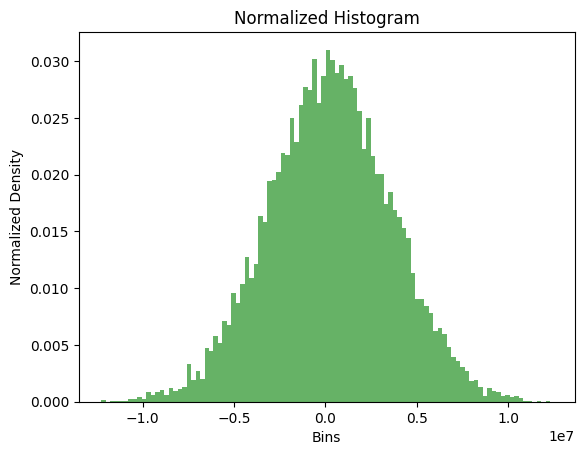

In [88]:
import numpy as np
import matplotlib.pyplot as plt


samples = np.random.normal(loc=mean, scale=std, size=int(count))
# Assuming you have already obtained the histogram data
density_values, bin_edges, _ = plt.hist(samples, bins=100, density=True, alpha=0.6, color='g')

# Calculate the width of each bin
bin_widths = np.diff(bin_edges)

# Calculate the total area under the histogram
total_area = np.sum(density_values * bin_widths)

# Normalize the density values
normalized_density_values = density_values / total_area

# Make sure the sum of normalized density values equals 1
normalized_density_values /= np.sum(normalized_density_values)

# Now, plot the histogram with the normalized density values
plt.bar(bin_edges[:-1], normalized_density_values, width=bin_widths, alpha=0.6, color='g')
plt.xlabel("Bins")
plt.ylabel("Normalized Density")
plt.title("Normalized Histogram")
plt.show()

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  What would you explore further with more time?

In [ ]:
# This data provides information on home sales by year, Town, and the type of property.
# additionally, the data shows the Assessed price of the property and the actual sales price.
# column 'Sales Ratio' is another column calculated by Assessed Price/salesprice
# First I filterd the sales ratio by Property type and Year. I noticed that there was more data on Residential homes
#Residential homes sales ratio is about 65% compared to commercial of 11.1%.
#This means that on average single homes have sold for more than the assessed price and commercial properties have sold for much less than the assessed price
# I calculated the selling price minus the assessed price to find the premium paid for the residential, single home properties
# Stamford had sold more homes at a premium than any other single homes
# the average sales ratio for stamford single homes was about 65%, close to the total single home average.
# the average premium paid for a stamford home is $397K.
# However, I noticed that there is a large standard deviation which makes predicting the market value of a single home in Stamford difficult, compared to the assessed value

In [38]:
# I could have repeated the same excerise for other towns or other types of property
# Look for another property type or town with very small deviations from the premium mean